# Real-time Covid 19 Data

## 1. Data Preparation

In [2]:
import pandas as pd

# URL of the raw CSV file on GitHub
url = 'https://raw.githubusercontent.com/datasets/covid-19/main/data/time-series-19-covid-combined.csv'

# Load the dataset
df = pd.read_csv(url)

# Display the first few rows of the DataFrame
print(df.head())


         Date Country/Region Province/State  Confirmed  Recovered  Deaths
0  2020-01-22    Afghanistan            NaN          0        0.0       0
1  2020-01-23    Afghanistan            NaN          0        0.0       0
2  2020-01-24    Afghanistan            NaN          0        0.0       0
3  2020-01-25    Afghanistan            NaN          0        0.0       0
4  2020-01-26    Afghanistan            NaN          0        0.0       0


## 2. Data Cleaning

In [3]:
# Check for missing values
print(df.isnull().sum())

# Fill missing values
df = df.fillna(0)  

Date                   0
Country/Region         0
Province/State    159120
Confirmed              0
Recovered          13056
Deaths                 0
dtype: int64


In [4]:
# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Confirm the conversion
print(df.dtypes)


Date              datetime64[ns]
Country/Region            object
Province/State            object
Confirmed                  int64
Recovered                float64
Deaths                     int64
dtype: object


## 3. Exploratory Data Analysis (EDA)


In [5]:
print(df.describe())


          Confirmed     Recovered         Deaths
count  2.317440e+05  2.317440e+05  231744.000000
mean   5.132362e+05  1.002279e+05    9760.170231
std    3.002239e+06  8.161111e+05   49749.871513
min    0.000000e+00  0.000000e+00       0.000000
25%    2.590000e+02  0.000000e+00       2.000000
50%    5.725000e+03  1.800000e+01      73.000000
75%    1.095645e+05  3.887000e+03    1777.000000
max    8.062512e+07  3.097475e+07  988609.000000


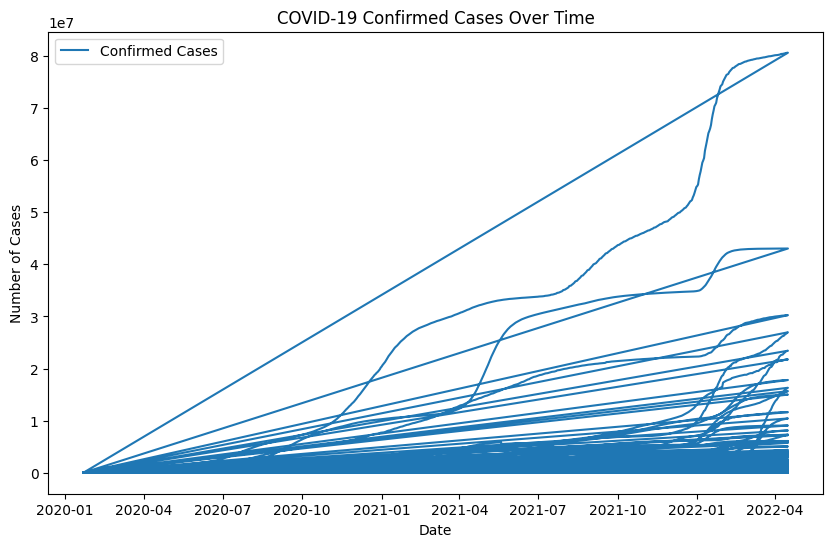

In [6]:
import matplotlib.pyplot as plt

# Plot confirmed cases over time
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Confirmed'], label='Confirmed Cases')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.title('COVID-19 Confirmed Cases Over Time')
plt.legend()
plt.show()


- The plot indicates an overall upward trend in the number of confirmed COVID-19 cases from January 2020 to April 2022.

- The increase in confirmed cases is not linear but rather exponential, indicating rapid growth over time.

- Multiple lines represent different regions or countries, each showing a distinct pattern of case growth.

- Some regions show a steady increase in cases, while others have more pronounced spikes.

- Notable increases are observed around late 2020, mid-2021, and early 2022, which likely correspond to different waves or the emergence of new variants.

- There is a noticeable variation in the slope of the lines, indicating differences in the rate of increase of confirmed cases among the regions.

- Some regions have a much steeper slope, suggesting a faster spread of the virus.

## 4. Data Aggregation


In [9]:
# Aggregate data by country
country_df = df.groupby('Country/Region').sum(numeric_only=True).reset_index()

print(country_df.head())

  Country/Region  Confirmed   Recovered   Deaths
0    Afghanistan   66031705  18289880.0  2874099
1        Albania   82385140  22652652.0  1320658
2        Algeria   94695072  25670233.0  2651996
3        Andorra    9598486   3085649.0    75889
4         Angola   26425596   5895800.0   605294


## 5. Advanced Analysis


In [11]:
# calculate the daily growth rate
df['daily_growth_rate'] = df['Confirmed'].pct_change() * 100

In [12]:
# compute the moving average to smooth out the time series data
df['moving_average'] = df['Confirmed'].rolling(window=7).mean()

## 6. Visualization


### Time Series Plot

Visualize the confirmed cases, deaths, and recoveries.


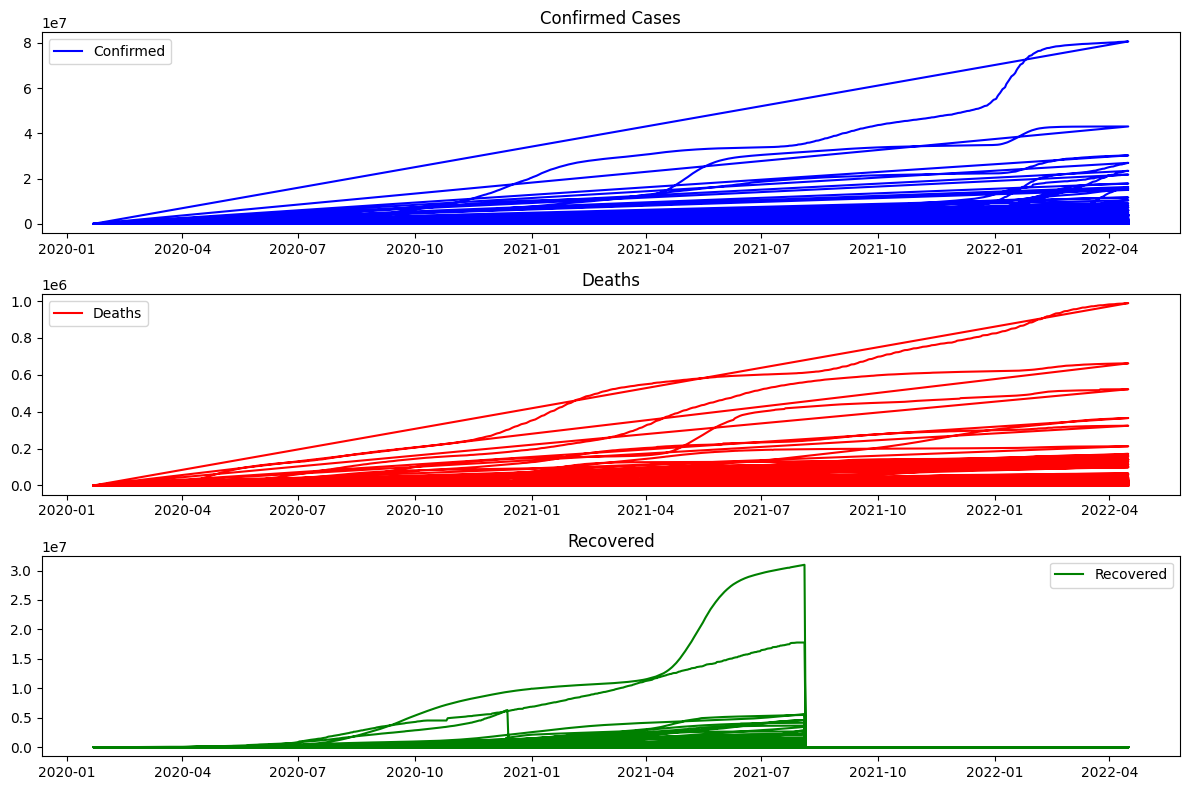

In [13]:
plt.figure(figsize=(12, 8))

# Confirmed cases
plt.subplot(3, 1, 1)
plt.plot(df['Date'], df['Confirmed'], label='Confirmed', color='blue')
plt.title('Confirmed Cases')
plt.legend()

# Deaths
plt.subplot(3, 1, 2)
plt.plot(df['Date'], df['Deaths'], label='Deaths', color='red')
plt.title('Deaths')
plt.legend()

# Recoveries
plt.subplot(3, 1, 3)
plt.plot(df['Date'], df['Recovered'], label='Recovered', color='green')
plt.title('Recovered')
plt.legend()

plt.tight_layout()
plt.show()


### Geographical Visualization

In [21]:
import folium
import pandas as pd

# Load the dataset
url = 'https://raw.githubusercontent.com/datasets/covid-19/main/data/time-series-19-covid-combined.csv'
df = pd.read_csv(url)

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Filter data for a few countries (example)
countries = ['China', 'Italy', 'United States', 'India', 'Brazil']
latest_date = df['Date'].max()
subset_df = df[(df['Country/Region'].isin(countries)) & (df['Date'] == latest_date)].copy()

# Manually add latitude and longitude for these countries (for demonstration purposes)
coordinates = {
    'China': [35.8617, 104.1954],
    'Italy': [41.8719, 12.5674],
    'United States': [37.0902, -95.7129],
    'India': [20.5937, 78.9629],
    'Brazil': [-14.2350, -51.9253]
}

# Add latitude and longitude using .loc
subset_df.loc[:, 'Latitude'] = subset_df['Country/Region'].map(lambda x: coordinates[x][0])
subset_df.loc[:, 'Longitude'] = subset_df['Country/Region'].map(lambda x: coordinates[x][1])

# Create a map
m = folium.Map(location=[20, 0], tiles='Stamen Toner', zoom_start=2, attr='Map tiles by Stamen Design, under CC BY 3.0. Data by OpenStreetMap, under ODbL.')

# Add points to the map
for i in range(len(subset_df)):
    folium.Circle(
        location=[subset_df.iloc[i]['Latitude'], subset_df.iloc[i]['Longitude']],
        radius=float(subset_df.iloc[i]['Confirmed']) * 0.0001,  # Scale the radius appropriately
        color='red',
        fill=True,
        fill_color='red'
    ).add_to(m)

# Save map to html file
m.save('covid_map.html')

m

## 7. Statistical Analysis


In [23]:
correlation = df[['Confirmed', 'Deaths', 'Recovered']].corr()
print(correlation)


           Confirmed    Deaths  Recovered
Confirmed   1.000000  0.916491   0.283841
Deaths      0.916491  1.000000   0.324056
Recovered   0.283841  0.324056   1.000000


## 8. Predictive Modeling


In [29]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Load the dataset
url = 'https://raw.githubusercontent.com/datasets/covid-19/main/data/time-series-19-covid-combined.csv'
df = pd.read_csv(url)

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Filter data for a specific country and aggregate by date
country = 'United States'
df_country = df[df['Country/Region'] == country].groupby('Date').sum(numeric_only=True).reset_index()

# Ensure there are enough data points
if len(df_country) > 10:  # Ensuring there's a reasonable amount of data
    # Fit an ARIMA model
    model = ARIMA(df_country['Confirmed'], order=(5, 1, 0))
    try:
        model_fit = model.fit()
        print(model_fit.summary())

        # Forecast
        forecast = model_fit.forecast(steps=10)
        print(forecast)
    except Exception as e:
        print(f"An error occurred: {e}")
else:
    print("Not enough data points to fit the model.")


Not enough data points to fit the model.
